### Load the dataset

In [1]:
import pandas as pd

B_group = pd.read_csv("C:/Users/Jack/Desktop/GroupWork/Code&Data/Data/processed/B_group.csv")
J_group = pd.read_csv("C:/Users/Jack/Desktop/GroupWork/Code&Data/Data/processed/J_group.csv")
B_group.head()

,code_presentation,id_student,gender,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_score,...,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,total_day
0,2013B,23629,1,-0.922687,-0.639061,3.828599,-0.481083,0,0,-0.645288,...,False,False,False,False,False,False,True,False,False,-0.704318
1,2013B,25107,1,-0.922687,-0.639061,-0.340229,0.979792,0,2,0.243781,...,False,False,False,False,False,False,True,False,False,0.774109
2,2013B,27891,0,-1.656320,-0.639061,3.828599,0.979792,1,1,-0.419673,...,False,False,False,False,False,False,True,False,False,-0.349111
3,2013B,29144,0,0.544580,-0.639061,-0.340229,0.979792,0,0,0.091815,...,False,False,False,False,False,False,True,False,False,0.630107
4,2013B,31663,0,-0.555870,1.472335,-0.340229,-0.481083,0,2,0.312966,...,False,False,False,False,True,False,False,False,False,0.774109


In [2]:
J_group.head()

,code_presentation,id_student,gender,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_score,...,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,total_day
0,2013J,11391,0,1.645030,3.583731,-0.340229,3.901543,0,2,0.687909,...,False,False,False,False,False,True,False,False,False,0.879711
1,2013J,28400,1,-0.922687,1.472335,-0.340229,-0.481083,0,2,0.342994,...,False,False,False,False,False,True,False,False,False,0.793310
2,2013J,30268,1,-0.555870,1.472335,-0.340229,-0.481083,1,1,-0.983913,...,False,False,False,False,True,False,False,False,False,-1.385930
3,2013J,31604,1,0.177763,1.472335,-0.340229,-0.481083,0,2,0.564146,...,False,False,False,False,True,False,False,False,False,1.033314
4,2013J,32885,1,0.177763,-0.639061,-0.340229,-0.481083,0,2,0.131988,...,False,False,True,False,False,False,True,False,False,0.870111


In [3]:
J_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20105 entries, 0 to 20104
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   code_presentation                              20105 non-null  object 
 1   id_student                                     20105 non-null  int64  
 2   gender                                         20105 non-null  int64  
 3   imd_band                                       17935 non-null  float64
 4   age_band                                       20105 non-null  float64
 5   num_of_prev_attempts                           20105 non-null  float64
 6   studied_credits                                20105 non-null  float64
 7   disability                                     20105 non-null  int64  
 8   final_result                                   20105 non-null  int64  
 9   weighted_score                                 201

In [4]:
# convert bool to int
def encode_bool_to_int(df):
    df = df.copy()
    bool_cols = df.select_dtypes(include="bool").columns
    df[bool_cols] = df[bool_cols].astype(int)
    return df

B_group = encode_bool_to_int(B_group)
J_group = encode_bool_to_int(J_group)

### Prepare for training

In [5]:
from __future__ import annotations

from typing import Optional, Sequence, Tuple, Dict, Any
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


def prepare_train_data(
    df: pd.DataFrame,
    target: str = "final_result",
    test_size: float = 0.2,
    random_state: int = 42,
    stratify: bool = True,
    drop_cols: Optional[Sequence[str]] = ("code_presentation", "id_student"),
    positive_label: Any = None,
    validate_numeric_X: bool = True,   # 你已独热数值化：默认只做校验，不做转换
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series, Dict[str, Any]]:
    if target not in df.columns:
        raise ValueError(f"目标列 '{target}' 不在数据中。现有列示例：{list(df.columns)[:20]}...")

    data = df.copy()

    # 1) 丢弃不需要列
    if drop_cols:
        cols_to_drop = [c for c in drop_cols if c in data.columns]
        data = data.drop(columns=cols_to_drop)
    else:
        cols_to_drop = []

    # 2) 丢弃 target 缺失行
    data = data.loc[~data[target].isna()].copy()

    # 3) 构造 X/y
    y = data[target].copy()
    X = data.drop(columns=[target]).copy()

    # 4) 可选：既然你已经独热 + 数值化，这里只做“是否全为数值”的校验
    if validate_numeric_X:
        non_numeric_cols = X.columns[~X.dtypes.apply(lambda t: pd.api.types.is_numeric_dtype(t))].tolist()
        if non_numeric_cols:
            raise ValueError(
                "检测到非数值特征列，但你说已经独热并数值化。"
                f"请检查这些列：{non_numeric_cols[:30]}"
                + ("..." if len(non_numeric_cols) > 30 else "")
            )
    else:
        non_numeric_cols = []

    # 5) 处理 y：如果是“看起来像分类且是整数型值”，转成 int（0/1, 1/2 等更干净）
    y_vec = y.copy()
    if pd.api.types.is_numeric_dtype(y_vec) and y_vec.dropna().nunique() <= 50:
        vals = y_vec.dropna().to_numpy()
        if np.all(np.isclose(vals, np.round(vals))):
            y_vec = y_vec.round().astype(int)

    # 6) stratify（只在分类且每类样本足够时启用）
    stratify_y = None
    stratify_used = False
    if stratify:
        nunique = pd.Series(y_vec).nunique(dropna=True)

        # “像分类”的条件：类别数不多
        if nunique <= 50:
            vc = pd.Series(y_vec).value_counts(dropna=True)
            min_count = int(vc.min()) if len(vc) else 0

            # 经验规则：至少保证每类能分到 train/valid（最少 2 个更稳）
            # valid 中期望数量：min_count * test_size
            if min_count >= 2 and (min_count * test_size) >= 1:
                stratify_y = y_vec
                stratify_used = True

    # 7) split the data
    try:
        X_train, X_valid, y_train, y_valid = train_test_split(
            X, y_vec,
            test_size=test_size,
            random_state=random_state,
            stratify=stratify_y
        )
    except ValueError:
        # stratify 失败（例如某类样本太少），自动降级为非分层切分
        X_train, X_valid, y_train, y_valid = train_test_split(
            X, y_vec,
            test_size=test_size,
            random_state=random_state,
            stratify=None
        )
        stratify_used = False

    # 8) 二分类时确定正类标签
    pos = positive_label
    if pos is None and pd.Series(y_vec).nunique(dropna=True) == 2:
        uniq = sorted(pd.Series(y_vec).dropna().unique().tolist())
        pos = uniq[-1]  # 默认较大值为正类（0/1 -> 1）

    info = {
        "n_samples": int(len(X)),
        "n_features": int(X.shape[1]),
        "target": target,
        "y_unique": int(pd.Series(y_vec).nunique(dropna=True)),
        "positive_label": pos,
        "dropped_cols": cols_to_drop,
        "validate_numeric_X": validate_numeric_X,
        "non_numeric_cols": non_numeric_cols,   # 校验模式下用于报错定位；否则为空
        "stratify_requested": bool(stratify),
        "stratify_used": bool(stratify_used),
        "train_size": int(len(X_train)),
        "valid_size": int(len(X_valid)),
    }

    return X_train, X_valid, y_train, y_valid, info


In [6]:
X_train_B, X_valid_B, y_train_B, y_valid_B, info_B = prepare_train_data(
    df=B_group,
    target="final_result", 
    test_size=0.2,
    random_state=42,
    stratify=True,
    drop_cols=("code_presentation", "id_student"), 
    validate_numeric_X=True
)

print(info_B)


{'n_samples': 12488, 'n_features': 38, 'target': 'final_result', 'y_unique': 4, 'positive_label': None, 'dropped_cols': ['code_presentation', 'id_student'], 'validate_numeric_X': True, 'non_numeric_cols': [], 'stratify_requested': True, 'stratify_used': True, 'train_size': 9990, 'valid_size': 2498}


In [7]:
X_train_J, X_valid_J, y_train_J, y_valid_J, info_J = prepare_train_data(
    df=J_group,
    target="final_result",
    test_size=0.2,
    random_state=42,
    stratify=True,
    drop_cols=("code_presentation", "id_student"),
    validate_numeric_X=True
)

print(info_J)


{'n_samples': 20105, 'n_features': 38, 'target': 'final_result', 'y_unique': 4, 'positive_label': None, 'dropped_cols': ['code_presentation', 'id_student'], 'validate_numeric_X': True, 'non_numeric_cols': [], 'stratify_requested': True, 'stratify_used': True, 'train_size': 16084, 'valid_size': 4021}


In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix_from_metrics(metrics, y_true):
    cm = metrics.get("confusion_matrix")
    if cm is None:
        print("No confusion matrix available.")
        return

    labels = sorted(np.unique(y_true))
    
    # 计算百分比
    cm_percent = cm.astype('float') / cm.sum() * 100
    
    # 创建蓝白色配色方案
    plt.figure(figsize=(8, 6))
    
    # 使用Blues颜色映射
    cmap = plt.cm.Blues
    im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, label='Count')
    
    plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
    plt.xlabel("Predicted label", fontsize=12)
    plt.ylabel("True label", fontsize=12)
    plt.xticks(range(len(labels)), labels)
    plt.yticks(range(len(labels)), labels)

    # 在每个格子中显示百分比和数字
    thresh = cm.max() / 2.  # 阈值，用于决定文字颜色（深色/浅色）
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # 百分比和数量
            count = cm[i, j]
            percent = cm_percent[i, j]
            
            # 根据背景颜色决定文字颜色
            text_color = "white" if cm[i, j] > thresh else "black"
            
            plt.text(j, i, f"{percent:.1f}%\n({count})", 
                    ha="center", va="center", 
                    color=text_color, fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

### Start training

#### Random Forest

In [9]:
from typing import Optional, Dict, Any, Tuple
from feature_engineering import GAFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
)
from sklearn.pipeline import Pipeline


def train_rf_gridcv_with_ga_fs(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    X_valid: pd.DataFrame,
    y_valid: pd.Series,
    info: Optional[Dict[str, Any]] = None,
    *,
    random_state: int = 42,
    n_splits: int = 5,
    class_weight: Optional[str] = "balanced",
    scoring: Optional[str] = None,
    param_grid: Optional[Dict[str, list]] = None,
    topk_importance: int = 20,
    verbose: int = 1,
    n_jobs: int = -1,
    # --- GA 参数（特征工程） ---
    enable_feature_selection: bool = True,
    ga_population_size: int = 40,
    ga_generations: int = 25,
    ga_crossover_rate: float = 0.9,
    ga_mutation_rate: float = 0.02,
    ga_elitism: int = 2,
    ga_min_features: int = 1,
    ga_max_features: Optional[int] = None,
    ga_inner_cv_splits: int = 5,
) -> Tuple[RandomForestClassifier, GridSearchCV, Dict[str, Any], pd.Series]:

    if info is None:
        info = {}

    # --- 1) scoring ---
    y_unique = pd.Series(y_train).dropna().unique()
    is_binary = (len(y_unique) == 2)
    if scoring is None:
        scoring = "roc_auc" if is_binary else "accuracy"

    # --- 2) 先做一次 GA 特征选择（只在 X_train 上）---
    selected_cols = list(X_train.columns)
    fe = None

    if enable_feature_selection:
        ga_estimator = RandomForestClassifier(
            n_estimators=150,
            random_state=random_state,
            n_jobs=n_jobs,
            class_weight=class_weight,
        )
        fe = GAFeatureSelector(
            estimator=ga_estimator,
            scoring=scoring,
            n_splits=ga_inner_cv_splits,
            random_state=random_state,
            population_size=ga_population_size,
            generations=ga_generations,
            crossover_rate=ga_crossover_rate,
            mutation_rate=ga_mutation_rate,
            elitism=ga_elitism,
            min_features=ga_min_features,
            max_features=ga_max_features,
            verbose=1 if verbose else 0,
            n_jobs=n_jobs,
        )

        X_train_fs = fe.fit_transform(X_train, y_train)
        selected_cols = fe.selected_features_
        X_valid_fs = X_valid.loc[:, selected_cols]
    else:
        X_train_fs = X_train
        X_valid_fs = X_valid

    # --- 3) GridSearchCV（只调 RF，不再把 GA 放进 Pipeline）---
    clf = RandomForestClassifier(
        random_state=random_state,
        n_jobs=n_jobs,
        class_weight=class_weight,
    )

    if param_grid is None:
        param_grid = {
            "n_estimators": [300, 600],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 10],
            "min_samples_leaf": [1, 3],
            "max_features": ["sqrt", "log2"],
        }

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    grid = GridSearchCV(
        estimator=clf,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        verbose=verbose,
        refit=True,
        return_train_score=True,
    )

    grid.fit(X_train_fs, y_train)
    best_model: RandomForestClassifier = grid.best_estimator_

    # --- 4) 验证集评估 ---
    y_pred = best_model.predict(X_valid_fs)

    metrics: Dict[str, Any] = {
        "cv_best_score": float(grid.best_score_),
        "cv_scoring": scoring,
        "best_params": dict(grid.best_params_),
        "valid_accuracy": float(accuracy_score(y_valid, y_pred)),
        "confusion_matrix": confusion_matrix(y_valid, y_pred),
        "classification_report": classification_report(y_valid, y_pred, digits=4),
    }

    # --- 5) 二分类 AUC ---
    if is_binary and hasattr(best_model, "predict_proba"):
        pos = info.get(
            "positive_label",
            sorted(pd.Series(y_train).dropna().unique().tolist())[-1]
        )
        proba = best_model.predict_proba(X_valid_fs)
        classes = best_model.classes_
        pos_idx = int(np.where(classes == pos)[0][0])
        auc = roc_auc_score((pd.Series(y_valid) == pos).astype(int), proba[:, pos_idx])
        metrics["valid_roc_auc"] = float(auc)
        metrics["positive_label"] = pos

    # --- 6) 特征选择信息 + 特征重要性（对齐到原始列）---
    if enable_feature_selection and fe is not None:
        metrics["n_selected_features"] = int(len(selected_cols))
        metrics["selected_features"] = list(selected_cols)
        metrics["ga_best_score_inner_cv"] = float(fe.best_score_)

        imp_selected = pd.Series(best_model.feature_importances_, index=selected_cols)
        feature_importance = pd.Series(0.0, index=X_train.columns)
        feature_importance.loc[selected_cols] = imp_selected
        feature_importance = feature_importance.sort_values(ascending=False)
    else:
        feature_importance = pd.Series(
            best_model.feature_importances_,
            index=X_train.columns
        ).sort_values(ascending=False)

    metrics["topk_importance"] = feature_importance.head(topk_importance)

    return best_model, grid, metrics, feature_importance

[GA] gen=00 best_score=0.724525 best_k=33
[GA] gen=01 best_score=0.726627 best_k=28
[GA] gen=02 best_score=0.726727 best_k=29
[GA] gen=03 best_score=0.730130 best_k=28
[GA] gen=04 best_score=0.731231 best_k=29
[GA] gen=05 best_score=0.731231 best_k=29
[GA] gen=06 best_score=0.731231 best_k=29
[GA] gen=07 best_score=0.731231 best_k=29
[GA] gen=08 best_score=0.731231 best_k=29
[GA] gen=09 best_score=0.731231 best_k=29
[GA] gen=10 best_score=0.731231 best_k=29
[GA] gen=11 best_score=0.731231 best_k=29
[GA] gen=12 best_score=0.731732 best_k=26
[GA] gen=13 best_score=0.732232 best_k=26
[GA] gen=14 best_score=0.732232 best_k=26
[GA] gen=15 best_score=0.732232 best_k=26
[GA] gen=16 best_score=0.732232 best_k=26
[GA] gen=17 best_score=0.732232 best_k=26
[GA] gen=18 best_score=0.732232 best_k=26
[GA] gen=19 best_score=0.732232 best_k=26
[GA] gen=20 best_score=0.732232 best_k=26
[GA] gen=21 best_score=0.732232 best_k=26
[GA] gen=22 best_score=0.732232 best_k=26
[GA] gen=23 best_score=0.732232 be

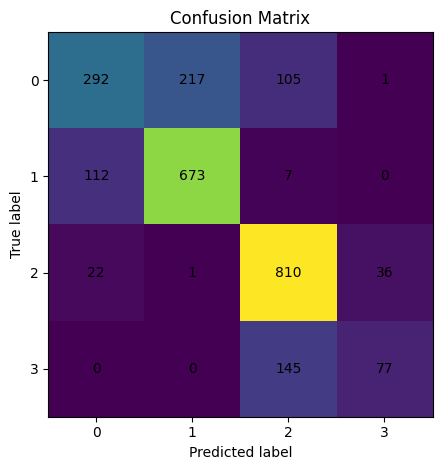

In [10]:
best_model_B_RF, grid_B_RF, metrics_B_RF, fi_B_RF = train_rf_gridcv_with_ga_fs(
    X_train_B, y_train_B, X_valid_B, y_valid_B, info_B,
    n_splits=5,
    verbose=1,
    enable_feature_selection=True,

    # --- GA feature selection params ---
    ga_population_size=40,
    ga_generations=25,
    ga_crossover_rate=0.9,
    ga_mutation_rate=0.02,
    ga_elitism=2,
    ga_min_features=10,
    ga_max_features=None,
    ga_inner_cv_splits=5,

    # 如果你在函数里加了 ga_verbose，就可以打开下面这行：
    # ga_verbose=1,
)

print("\n" + "=" * 60)
print("[GridSearchCV] Results")
print("- Best CV score:", metrics_B_RF.get("cv_best_score"))
print("- Scoring:", metrics_B_RF.get("cv_scoring"))
print("- Best params:", metrics_B_RF.get("best_params"))

print("\n" + "=" * 60)
print("[Validation] Results")
print("- Valid accuracy:", metrics_B_RF.get("valid_accuracy"))
if "valid_roc_auc" in metrics_B_RF:
    print("- Valid ROC-AUC:", metrics_B_RF["valid_roc_auc"])

print("\n" + "=" * 60)
print("[Validation] Classification Report")
print(metrics_B_RF.get("classification_report"))

print("\n" + "=" * 60)
print("[GA Feature Selection] Summary")
print("- Selected features:", metrics_B_RF.get("n_selected_features"))
print("- GA best inner-CV score:", metrics_B_RF.get("ga_best_score_inner_cv"))

selected = metrics_B_RF.get("selected_features", None)
if selected is not None:
    print("\nSelected feature names:")
    print(selected)

print("\n" + "=" * 60)
print("[Feature Importance] Top 20")
topk = metrics_B_RF.get("topk_importance", None)
if topk is not None:
    print(topk)
else:
    print("No feature importance available.")
print("=" * 60 + "\n")

plot_confusion_matrix_from_metrics(metrics_B_RF, y_valid_B)

[GA] gen=00 best_score=0.768777 best_k=36
[GA] gen=01 best_score=0.768777 best_k=36
[GA] gen=02 best_score=0.769958 best_k=36
[GA] gen=03 best_score=0.769958 best_k=36
[GA] gen=04 best_score=0.769958 best_k=36
[GA] gen=05 best_score=0.769958 best_k=36
[GA] gen=06 best_score=0.769958 best_k=36
[GA] gen=07 best_score=0.769958 best_k=36
[GA] gen=08 best_score=0.769958 best_k=36
[GA] gen=09 best_score=0.769958 best_k=36
[GA] gen=10 best_score=0.769958 best_k=36
[GA] gen=11 best_score=0.769958 best_k=36
[GA] gen=12 best_score=0.769958 best_k=36
[GA] gen=13 best_score=0.769958 best_k=36
[GA] gen=14 best_score=0.772320 best_k=28
[GA] gen=15 best_score=0.772320 best_k=28
[GA] gen=16 best_score=0.772320 best_k=28
[GA] gen=17 best_score=0.772320 best_k=28
[GA] gen=18 best_score=0.772320 best_k=28
[GA] gen=19 best_score=0.772320 best_k=28
[GA] gen=20 best_score=0.772320 best_k=28
[GA] gen=21 best_score=0.772320 best_k=28
[GA] gen=22 best_score=0.772320 best_k=29
[GA] gen=23 best_score=0.772320 be

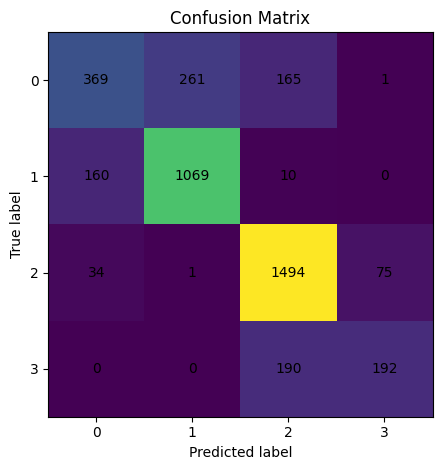

In [14]:
best_model_J_RF, grid_J_RF, metrics_J_RF, fi_J_RF = train_rf_gridcv_with_ga_fs(
    X_train_J, y_train_J, X_valid_J, y_valid_J, info_J,
    n_splits=5,
    verbose=1,
    enable_feature_selection=True,

    # --- GA feature selection params ---
    ga_population_size=40,
    ga_generations=25,
    ga_crossover_rate=0.9,
    ga_mutation_rate=0.02,
    ga_elitism=2,
    ga_min_features=10,
    ga_max_features=None,
    ga_inner_cv_splits=5,
)

print("\n" + "=" * 60)
print("[GridSearchCV] Results")
print("- Best CV score:", metrics_J_RF.get("cv_best_score"))
print("- Best params:", metrics_J_RF.get("best_params"))

print("\n" + "=" * 60)
print("[Validation] Results")
print("- Valid accuracy:", metrics_J_RF.get("valid_accuracy"))
if "valid_roc_auc" in metrics_J_RF:
    print("- Valid ROC-AUC:", metrics_J_RF["valid_roc_auc"])

print("\n" + "=" * 60)
print("[Validation] Classification Report")
print(metrics_J_RF.get("classification_report"))

print("\n" + "=" * 60)
print("[GA Feature Selection] Summary")
print("- Selected features:", metrics_J_RF.get("n_selected_features"))
print("- GA best inner-CV score:", metrics_J_RF.get("ga_best_score_inner_cv"))

selected = metrics_J_RF.get("selected_features", None)
if selected is not None:
    print("\nSelected feature names:")
    print(selected[:30], "..." if len(selected) > 30 else "")

print("\n" + "=" * 60)
print("[Feature Importance] Top 20")
topk = metrics_J_RF.get("topk_importance", None)
if topk is not None:
    print(topk)
else:
    print("No feature importance available.")
print("=" * 60 + "\n")

plot_confusion_matrix_from_metrics(metrics_J_RF, y_valid_J)


### XGBoost

In [15]:
from typing import Optional, Dict, Any, Tuple
import numpy as np
import pandas as pd

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
)

from feature_engineering import GAFeatureSelector


def train_xgb_gridcv_with_ga_fs(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    X_valid: pd.DataFrame,
    y_valid: pd.Series,
    info: Optional[Dict[str, Any]] = None,
    *,
    random_state: int = 42,
    n_splits: int = 5,
    scoring: Optional[str] = None,
    param_grid: Optional[Dict[str, list]] = None,
    topk_importance: int = 20,
    verbose: int = 1,
    n_jobs: int = -1,

    # --- GA 参数 ---
    ga_population_size: int = 20,
    ga_generations: int = 10,
    ga_crossover_rate: float = 0.9,
    ga_mutation_rate: float = 0.02,
    ga_elitism: int = 2,
    ga_min_features: int = 10,
    ga_max_features: Optional[int] = None,
    ga_inner_cv_splits: int = 3,
    ga_estimator_n_estimators: int = 150,
    ga_verbose: int = 1,

    # --- 类别不平衡 ---
    scale_pos_weight: Optional[float] = None,
) -> Tuple[XGBClassifier, GridSearchCV, Dict[str, Any], pd.Series]:

    if info is None:
        info = {}

    # --- 1) 二分类/多分类 & scoring ---
    y_unique = pd.Series(y_train).dropna().unique()
    is_binary = (len(y_unique) == 2)
    if scoring is None:
        scoring = "roc_auc" if is_binary else "accuracy"

    if is_binary:
        default_eval_metric = "logloss"
        objective = "binary:logistic"
        num_class = None
    else:
        default_eval_metric = "mlogloss"
        objective = "multi:softprob"
        num_class = int(len(y_unique))

    # --- 2) 外层 CV（仅用于 GridSearch） ---
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # --- 3) GA 先跑一次（只在 X_train 上） ---
    ga_estimator = XGBClassifier(
        n_estimators=ga_estimator_n_estimators,
        random_state=random_state,
        n_jobs=n_jobs,
        objective=objective,
        num_class=num_class,
        eval_metric=default_eval_metric,
        tree_method="hist",
        scale_pos_weight=scale_pos_weight if (is_binary and scale_pos_weight is not None) else None,
    )

    fe = GAFeatureSelector(
        estimator=ga_estimator,
        scoring=scoring,
        n_splits=ga_inner_cv_splits,
        random_state=random_state,
        population_size=ga_population_size,
        generations=ga_generations,
        crossover_rate=ga_crossover_rate,
        mutation_rate=ga_mutation_rate,
        elitism=ga_elitism,
        min_features=ga_min_features,
        max_features=ga_max_features,
        verbose=ga_verbose,
        n_jobs=n_jobs,
    )

    X_train_fs = fe.fit_transform(X_train, y_train)
    selected_cols = fe.selected_features_
    X_valid_fs = X_valid.loc[:, selected_cols]
    ga_best_score_inner = float(fe.best_score_)

    # --- 4) GridSearchCV：只调 XGB ---
    clf = XGBClassifier(
        random_state=random_state,
        n_jobs=n_jobs,
        objective=objective,
        num_class=num_class,
        eval_metric=default_eval_metric,
        tree_method="hist",
        scale_pos_weight=scale_pos_weight if (is_binary and scale_pos_weight is not None) else None,
    )

    if param_grid is None:
        param_grid = {
            "n_estimators": [300, 600],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.05, 0.1],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0],
            "min_child_weight": [1, 5],
            "reg_lambda": [1.0, 5.0],
        }

    grid = GridSearchCV(
        estimator=clf,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        verbose=verbose,
        refit=True,
        return_train_score=True,
    )

    grid.fit(X_train_fs, y_train)
    best_model: XGBClassifier = grid.best_estimator_

    # --- 5) 验证集评估 ---
    y_pred = best_model.predict(X_valid_fs)

    metrics: Dict[str, Any] = {
        "cv_best_score": float(grid.best_score_),
        "cv_scoring": scoring,
        "best_params": dict(grid.best_params_),
        "valid_accuracy": float(accuracy_score(y_valid, y_pred)),
        "confusion_matrix": confusion_matrix(y_valid, y_pred),
        "classification_report": classification_report(y_valid, y_pred, digits=4),

        # GA 信息
        "n_selected_features": int(len(selected_cols)),
        "selected_features": list(selected_cols),
        "ga_best_score_inner_cv": ga_best_score_inner,
    }

    # --- 6) 二分类 AUC ---
    if is_binary and hasattr(best_model, "predict_proba"):
        pos = info.get("positive_label", sorted(pd.Series(y_train).dropna().unique().tolist())[-1])
        proba = best_model.predict_proba(X_valid_fs)
        classes = best_model.classes_
        pos_idx = int(np.where(classes == pos)[0][0])
        auc = roc_auc_score((pd.Series(y_valid) == pos).astype(int), proba[:, pos_idx])
        metrics["valid_roc_auc"] = float(auc)
        metrics["positive_label"] = pos

    # --- 7) 特征重要性对齐到原始列 ---
    imp_selected = pd.Series(best_model.feature_importances_, index=selected_cols)
    feature_importance = pd.Series(0.0, index=X_train.columns)
    feature_importance.loc[selected_cols] = imp_selected
    feature_importance = feature_importance.sort_values(ascending=False)

    metrics["topk_importance"] = feature_importance.head(topk_importance)

    return best_model, grid, metrics, feature_importance

[GA] gen=00 best_score=0.718218 best_k=36
[GA] gen=01 best_score=0.718218 best_k=36
[GA] gen=02 best_score=0.719620 best_k=34
[GA] gen=03 best_score=0.719620 best_k=34
[GA] gen=04 best_score=0.719620 best_k=34
[GA] gen=05 best_score=0.720621 best_k=31
[GA] gen=06 best_score=0.721121 best_k=32
[GA] gen=07 best_score=0.721121 best_k=32
[GA] gen=08 best_score=0.721121 best_k=32
[GA] gen=09 best_score=0.721121 best_k=32
[GA] gen=10 best_score=0.721121 best_k=31
[GA] gen=11 best_score=0.721121 best_k=31
[GA] gen=12 best_score=0.721121 best_k=31
[GA] gen=13 best_score=0.721121 best_k=31
[GA] gen=14 best_score=0.721121 best_k=31
[GA] gen=15 best_score=0.721121 best_k=31
[GA] gen=16 best_score=0.721121 best_k=31
[GA] gen=17 best_score=0.721221 best_k=32
[GA] gen=18 best_score=0.722523 best_k=30
[GA] gen=19 best_score=0.722523 best_k=30
[GA] gen=20 best_score=0.722523 best_k=30
[GA] gen=21 best_score=0.722523 best_k=30
[GA] gen=22 best_score=0.722523 best_k=30
[GA] gen=23 best_score=0.722523 be

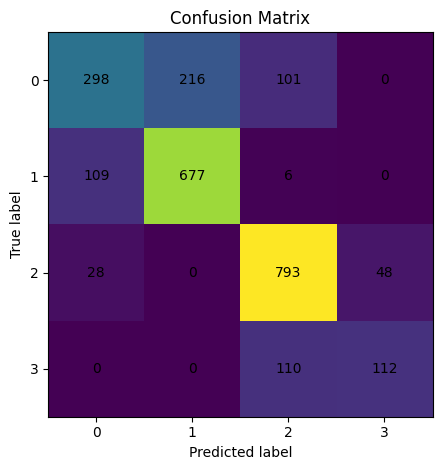

In [18]:
best_model_B_XGB, grid_B_XGB, metrics_B_XGB, fi_B_XGB = train_xgb_gridcv_with_ga_fs(
    X_train_B, y_train_B, X_valid_B, y_valid_B, info_B,
    n_splits=5,
    verbose=1,
    ga_population_size=40,
    ga_generations=25,
    ga_inner_cv_splits=5,
    ga_min_features=10,
    ga_verbose=1,
)

print("\n" + "=" * 60)
print("[XGB | GridSearchCV] Results")
print("- Best CV score:", metrics_B_XGB.get("cv_best_score"))
print("- Scoring:", metrics_B_XGB.get("cv_scoring"))
print("- Best params:", metrics_B_XGB.get("best_params"))

print("\n" + "=" * 60)
print("[XGB | Validation] Results")
print("- Valid accuracy:", metrics_B_XGB.get("valid_accuracy"))
if "valid_roc_auc" in metrics_B_XGB:
    print("- Valid ROC-AUC:", metrics_B_XGB["valid_roc_auc"])

print("\n" + "=" * 60)
print("[XGB | Validation] Classification Report")
print(metrics_B_XGB.get("classification_report"))

print("\n" + "=" * 60)
print("[XGB | Feature Selection] Summary")
print("- Selected features:", metrics_B_XGB.get("n_selected_features"))

selected = metrics_B_XGB.get("selected_features", None)
if selected is not None:
    print("\nSelected feature names (first 30):")
    print(selected[:30], "..." if len(selected) > 30 else "")

print("\n" + "=" * 60)
print("[XGB | Feature Importance] Top 20")
topk = metrics_B_XGB.get("topk_importance", None)
if topk is not None:
    print(topk)
else:
    print("No feature importance available.")
print("=" * 60 + "\n")

plot_confusion_matrix_from_metrics(metrics_B_XGB, y_valid_B)

[GA] gen=00 best_score=0.765357 best_k=36
[GA] gen=01 best_score=0.765979 best_k=35
[GA] gen=02 best_score=0.767782 best_k=33
[GA] gen=03 best_score=0.767782 best_k=33
[GA] gen=04 best_score=0.767782 best_k=33
[GA] gen=05 best_score=0.767782 best_k=33
[GA] gen=06 best_score=0.767782 best_k=33
[GA] gen=07 best_score=0.768155 best_k=31
[GA] gen=08 best_score=0.768155 best_k=31
[GA] gen=09 best_score=0.768155 best_k=31
[GA] gen=10 best_score=0.768155 best_k=32
[GA] gen=11 best_score=0.768341 best_k=33
[GA] gen=12 best_score=0.768341 best_k=33
[GA] gen=13 best_score=0.768341 best_k=33
[GA] gen=14 best_score=0.768341 best_k=33
[GA] gen=15 best_score=0.768341 best_k=33
[GA] gen=16 best_score=0.768963 best_k=32
[GA] gen=17 best_score=0.768963 best_k=32
[GA] gen=18 best_score=0.768963 best_k=32
[GA] gen=19 best_score=0.768963 best_k=32
[GA] gen=20 best_score=0.768963 best_k=32
[GA] gen=21 best_score=0.768963 best_k=32
[GA] gen=22 best_score=0.768963 best_k=32
[GA] gen=23 best_score=0.768963 be

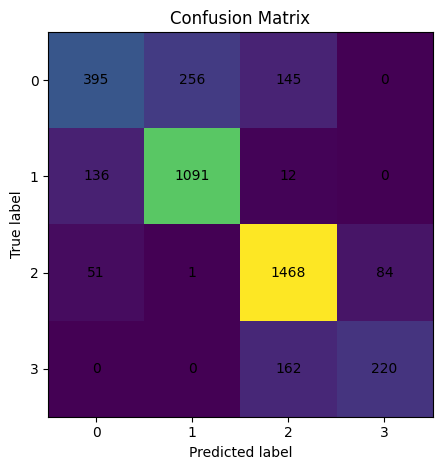

In [ ]:
best_model_J_XGB, grid_J_XGB, metrics_J_XGB, fi_J_XGB = train_xgb_gridcv_with_ga_fs(
    X_train_J, y_train_J, X_valid_J, y_valid_J, info_J,
    n_splits=5,
    verbose=1,

    # --- GA params ---
    ga_population_size=50,
    ga_generations=25,
    ga_crossover_rate=0.9,
    ga_mutation_rate=0.02,
    ga_elitism=2,
    ga_min_features=10,
    ga_max_features=None,
    ga_inner_cv_splits=5,
    ga_estimator_n_estimators=150,
    ga_verbose=1,

    # binary classification and imbalanced data:
    # scale_pos_weight=((y_train_J==0).sum() / (y_train_J==1).sum()),
)

print("\n" + "=" * 60)
print("[XGB+GA | GridSearchCV] Results")
print("- Best CV score:", metrics_J_XGB.get("cv_best_score"))
print("- Scoring:", metrics_J_XGB.get("cv_scoring"))
print("- Best params:", metrics_J_XGB.get("best_params"))

print("\n" + "=" * 60)
print("[XGB+GA | Validation] Results")
print("- Valid accuracy:", metrics_J_XGB.get("valid_accuracy"))
if "valid_roc_auc" in metrics_J_XGB:
    print("- Valid ROC-AUC:", metrics_J_XGB["valid_roc_auc"])

print("\n" + "=" * 60)
print("[XGB+GA | Validation] Classification Report")
print(metrics_J_XGB.get("classification_report"))

print("\n" + "=" * 60)
print("[GA Feature Selection] Summary")
print("- Selected features:", metrics_J_XGB.get("n_selected_features"))
print("- GA best inner-CV score:", metrics_J_XGB.get("ga_best_score_inner_cv"))

selected = metrics_J_XGB.get("selected_features", None)
if selected is not None:
    print("\nSelected feature names (first 30):")
    print(selected[:30], "..." if len(selected) > 30 else "")

print("\n" + "=" * 60)
print("[Feature Importance] Top 20")
topk = metrics_J_XGB.get("topk_importance", None)
if topk is not None:
    print(topk)
else:
    print("No feature importance available.")
print("=" * 60 + "\n")

plot_confusion_matrix_from_metrics(metrics_J_XGB, y_valid_J)